In [1]:
import flipflopinertial as ffi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib as mpl

# set up a custom colormap
from matplotlib.colors import LinearSegmentedColormap
cm_data = np.loadtxt("batlow.txt")
batlow = LinearSegmentedColormap.from_list('batlow', cm_data)
x = np.linspace(0,1,25)
np.random.shuffle(x)
import cycler
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color',batlow(x))
x = np.array([0.0, 0.25, 0.5, 0.6,0.7])
colors = batlow(x)[::-1]
c5,c4,c3,c2,c1=colors


# set the latex font
#plt.rcParams.update({
#    "text.usetex": True,})
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)


# This figure displays velocities and displacements of individual particles

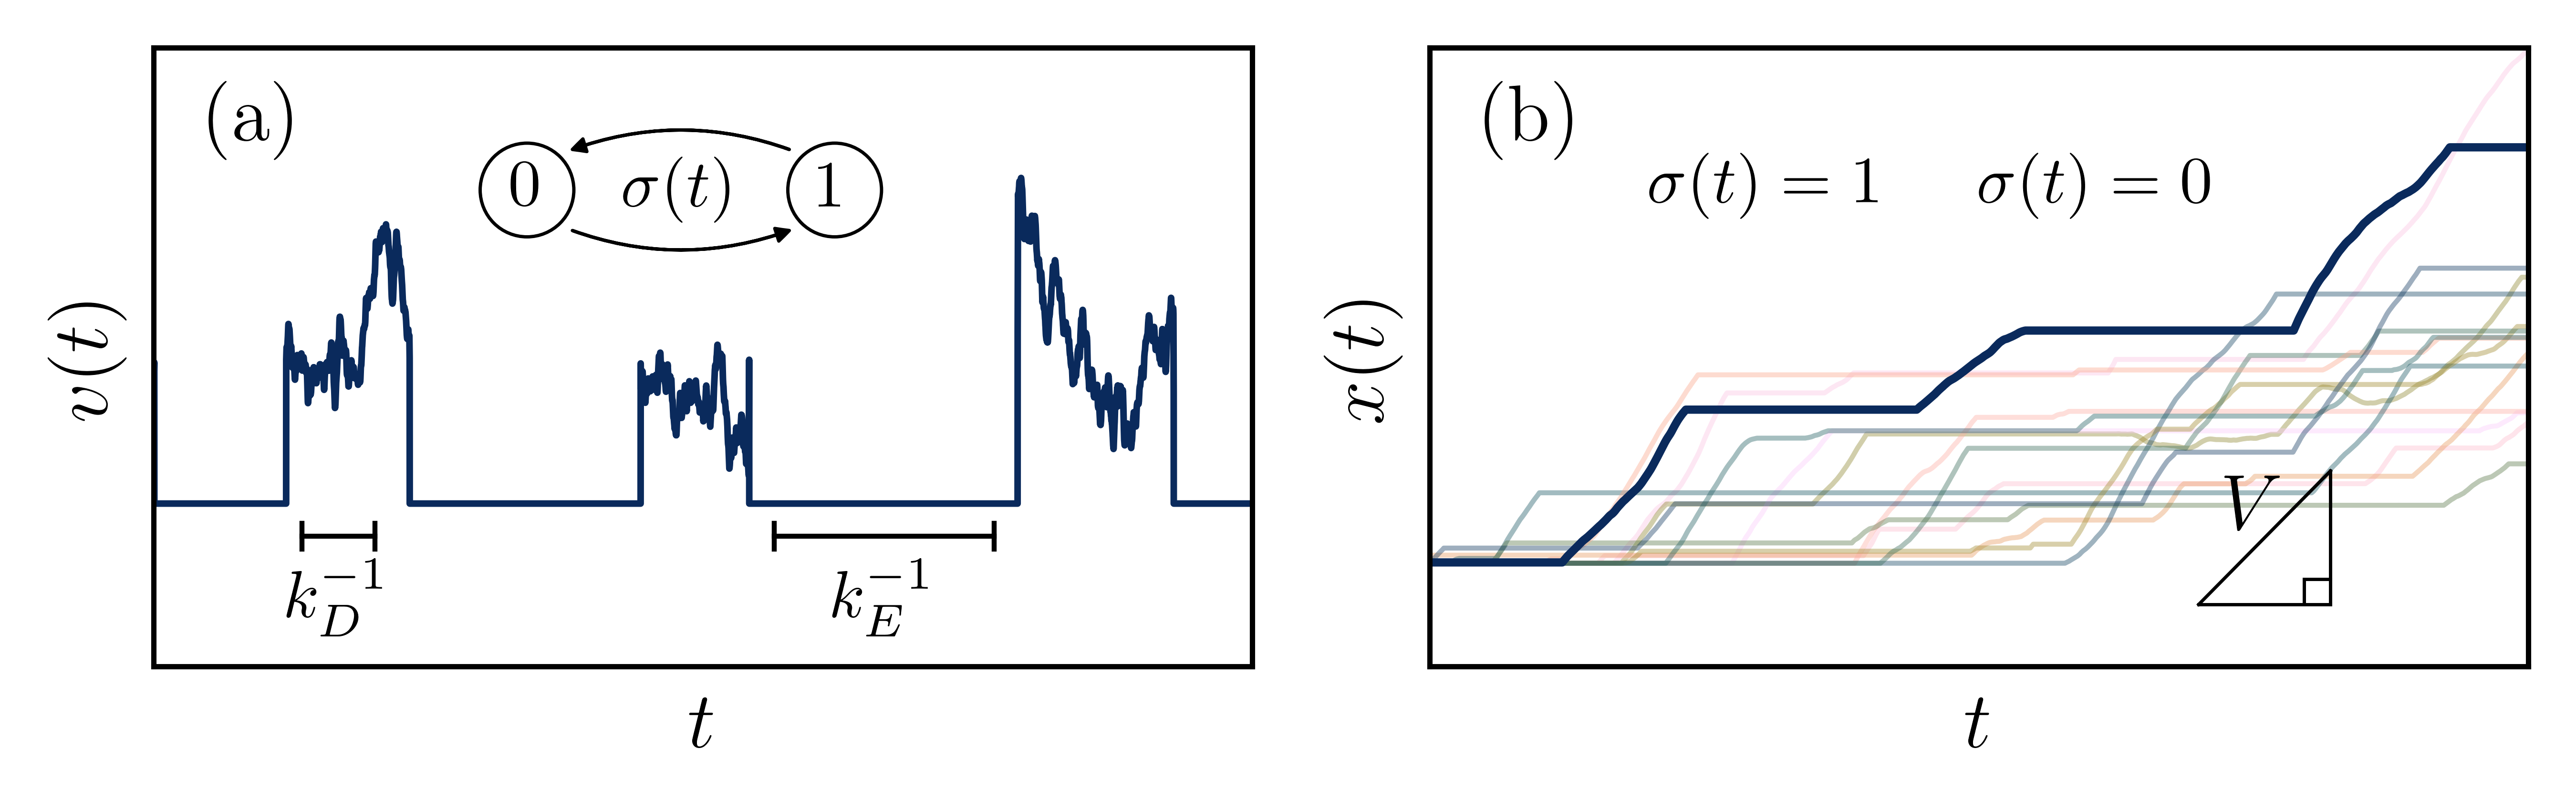

In [5]:
seed=569
ke = 1/3# 1/ rest time
kd = 1/1 # 1/ motion time
gam = 1/(0.6/kd)
vbar= 1 # mean velocity
Pe = 3 # pe = v^2 gam^2 /(2 Gam kd)
Gam = vbar**2*gam**2/(Pe*2*kd)
dt = 1e-3
Np = 15 # number of simulations
tmax= 15 # max simulation time
x0=0 # starting position
T  = np.arange(0,tmax,dt)
stop=False # do not stop simulations that cross x=0.
L=0 # roundabout way of starting particles at x0=0.
params = [ke,kd,gam,Gam,vbar,x0,T,dt,L,stop,0]

# set the color 
color = c1

# first do the simulations for the particles in the background
O = []
for n in range(Np):
    o = ffi.walkit(*params,seed=seed+n**3)

    O.append(o)
O = np.array(O) # first axis is different simulations, 
        # then later axes are position, velocity, state respectively.
Tplot = T/tmax
X = np.array([o[0] for o in O]) # scaled positions by the expected max displacement
V = np.array([o[1] for o in O]) # scaled velocities
S = np.array([o[2] for o in O]) # states
xmax = np.amax(X)
X = X/xmax

x = X[0]
v = V[0]
s = S[0]
nc = 10 # number of points to smooth the velocity signal over for plotting.
vs = np.zeros_like(v)
vs[s==1]= np.convolve(v[s==1], np.ones(nc)/nc, mode='same')
vsmax = vs.max()
vs = vs/vsmax

xsmol = 4
smol = 6 # the font sizes
med = 10
lar = 12
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=lar)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)

# initialize the figure
h = 1.8 # height
w = 5.5 # width

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(w,h),dpi=1000,tight_layout=True)
ax1.set_xlabel(r"$t$",fontsize=lar)
ax1.set_ylabel(r"$v(t)$",fontsize=lar)
ax2.set_xlabel(r"$t$",fontsize=lar)
ax2.set_ylabel(r"$x(t)$",fontsize=lar)

ax1.plot(Tplot,vs,lw=1,color=color,zorder=1)
ax2.plot(Tplot,x/1.15,lw=1.25,color=color,zorder=1) # scaled by 2 for appearance

# turn off axis ticks...
ax1.axes.yaxis.set_ticklabels([])
ax1.set_yticks([])
ax1.axes.xaxis.set_ticklabels([])
ax1.set_xticks([])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([])
ax2.axes.xaxis.set_ticklabels([])
ax2.set_xticks([])

################################################
##############################################33
for i in range(1,len(O)):
    xi = X[i]
    ax2.plot(Tplot,xi,lw=0.75,zorder=-1,alpha=0.4)

# set up the limits.
yminax1 = -0.5
ymaxax1 = 1.4
ax1.set_ylim(yminax1,ymaxax1)
ax1.set_xlim(0,1)
ax2.set_xlim(0,1)
yminax2 = -0.2
ymaxax2 = 1
ax2.set_ylim(yminax2,ymaxax2)

t0 = 0.8
x0 = -0.0
dt0 = 0.1
dx0 = 0.1


# now make the triangle
vplot = vbar/xmax*tmax
ti = 0.7
xi = -0.08

dti = 0.12
dxi = vplot*dti
plt.plot([ti,ti+dti],[xi,xi+dxi],lw=0.5,color='black') # hypotenuse
plt.plot([ti,ti+dti],[xi,xi],lw=0.5,color='black') # base
plt.plot([ti+dti,ti+dti],[xi,xi+dxi],lw=0.5,color='black') # vertical
# angle inside
from operator import sub
def get_aspect(ax):
    # Total figure size
    figW, figH = ax.get_figure().get_size_inches()
    # Axis size on figure
    _, _, w, h = ax.get_position().bounds
    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)
    # Ratio of data units
    # Negative over negative because of the order of subtraction
    data_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())

    return disp_ratio / data_ratio
a = 1/get_aspect(ax2)

dta = dti/5
dxa = dta*a*1.2
plt.plot([ti+dti-dta,ti+dti-dta],[xi,xi+dxa],lw=0.5,color='black')
plt.plot([ti+dti-dta,ti+dti],[xi+dxa,xi+dxa],lw=0.5,color='black')

plt.text(ti+dti/2.75,xi+dxi/2.3,r"$V$",ha='center',va='bottom',fontsize=lar)

################# ANNOTATIONS ###############
# now form the annotations on the left...
#1/kd annotation
t0 = 0.565
h = -0.1
dt0 = 1/ke/tmax
lw=0.75
ax1.plot([t0,t0+dt0],[h,h],lw=lw,color='black')
dv0=0.04
ax1.plot([t0,t0],[h-dv0,h+dv0],lw=lw,color='black')
ax1.plot([t0+dt0,t0+dt0],[h-dv0,h+dv0],lw=lw,color='black')
ax1.text(t0+dt0/2,h-0.07,r"$k_E^{-1}$",ha='center',va='top',fontsize=med)

# 1/kd annotation
t0 = 0.135
#h = -0.1
dt0 = 1/kd/tmax
ax1.plot([t0,t0+dt0],[h,h],lw=lw,color='black')
ax1.plot([t0,t0],[h-dv0,h+dv0],lw=lw,color='black')
ax1.plot([t0+dt0,t0+dt0],[h-dv0,h+dv0],lw=lw,color='black')
ax1.text(t0+dt0/2,h-0.07,r"$k_D^{-1}$",ha='center',va='top',fontsize=med)

fx = 0.05
fy = 0.85
ax1.text(fx,fy*(ymaxax1-yminax1) + yminax1, '(a)',fontsize=lar)
ax2.text(fx,fy*(ymaxax2-yminax2) + yminax2, '(b)',fontsize=lar)



# add the little diagram in the right panel indicating motion/rest flipping

ax=ax1

x0 = 0.48
y0 = 0.77*(ymaxax1-yminax1)+yminax1
dx = 0.14
dyt = 0.16
ax.text(x0,y0,r"$\sigma(t)$",fontsize=med,ha='center',va='center')
ax.text(x0-dx,y0,r"$0$",fontsize=med,ha='center',va='center')
ax.text(x0+dx,y0,r"$1$",fontsize=med,ha='center',va='center')


style = "Simple, tail_width=0.01, head_width=2, head_length=2"
kw = dict(arrowstyle=style, color="black",lw=0.5)
dxa=0.03
dya=0.11
toparrow = mpl.patches.FancyArrowPatch((x0+dx-dxa,y0+dya),(x0-dx+dxa,y0+dya),
                             connectionstyle="arc3,rad=.2", **kw)
ax.add_patch(toparrow)
botarrow = mpl.patches.FancyArrowPatch((x0-dx+dxa,y0-dya),(x0+dx-dxa,y0-dya),
                             connectionstyle="arc3,rad=.2", **kw,)
ax.add_patch(botarrow)
# now add little circles around the 0 and 1
ax.scatter([x0-dx], [y0], s=200, edgecolor="k", facecolor="none",lw=0.5)
ax.scatter([x0+dx], [y0], s=200, edgecolor="k", facecolor="none",lw=0.5)


# now develop annotations in the right panel
ax2.text(0.5,0.7,r"$\sigma(t) = 0$",fontsize=med)
ax2.text(0.2,0.7,r"$\sigma(t) =  1$",fontsize=med)


plt.savefig('/home/kp/Desktop/flipflop/figures/figure0.pdf',dpi=1000)

### COLORS:
    * 10,42,92,255 -- BLUE
    * 43,101,94,255 -- TEAL
    * 186,143,51,255 -- GREEN
    * 230,152,89,255 -- ORANGE

from here it remains to organize and correct the figure in inkscape, including
1. the color of the bar over k_D is wrong
2. the alignment of the 0 and 1 in the left panel is off
3. sigma=0,1 in the right panel are placed randomly and should be moved. annotations should be added.
4. The V is not centered on the triangle and the triangle interferes with the trajectories. This should be corrected